In [30]:
%%capture
!pip install geopandas
import geopandas as gpd
import pandas as pd

In [85]:
tx_pop_lgbt_casamento = pd.read_csv('https://raw.githubusercontent.com/gabrielacaesar/lgbt_casamento/main/data/analysis/tx_pop_lgbt_casamento.csv')
tx_pop_lgbt_casamento = tx_pop_lgbt_casamento.groupby(['ano', 'uf']).agg({'numero': sum,'tx_pop': sum}).reset_index()
tx_pop_lgbt_casamento.head(7)

,ano,uf,numero,tx_pop
0,2013,AC,0,0.000000
1,2013,AL,17,1.404225
2,2013,AM,7,0.547217
3,2013,AP,6,2.380704
4,2013,BA,99,1.809937
5,2013,CE,184,5.504470
6,2013,DF,83,7.774620


In [68]:
print(" --------------------------- \n         Bem-vindo/a! \n ---------------------------")
ano_user = int(input("Escolha um ano de 2013 a 2019: \n"))
#print(uf_user)
print(" --------------------------- \n      Já vamos calcular! \n ---------------------------")

 --------------------------- 
         Bem-vindo/a! 
 ---------------------------
Escolha um ano de 2013 a 2019: 
2018
 --------------------------- 
      Já vamos calcular! 
 ---------------------------


In [84]:
ano_user_tx_pop_lgbt_casamento = tx_pop_lgbt_casamento.query('ano == @ano_user', engine='python')
ano_user_tx_pop_lgbt_casamento.head(7)

,ano,uf,numero,tx_pop
135,2018,AC,18,5.904810
136,2018,AL,95,7.531687
137,2018,AM,49,3.400385
138,2018,AP,8,2.707445
139,2018,BA,288,4.952900
140,2018,CE,330,9.226488
141,2018,DF,274,23.279620


In [69]:
# referencia https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585
# baixe o arquivo abaixo no link https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas/15759-brasil.html?=&t=downloads
# clique em 'bcim' > 'versao2016' > 'geopackage' > 'bcim_2016_21_11_2018.gpkg'
info_ufs = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

In [58]:
info_ufs.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [73]:
info_ufs.rename({'sigla':'uf'}, axis = 1, inplace = True)
mapa_br = info_ufs.merge(ano_user_tx_pop_lgbt_casamento, on = 'uf', how = 'left')
#mapa_br[['uf', 'ano', 'numero', 'tx_pop', 'geometry']].head()

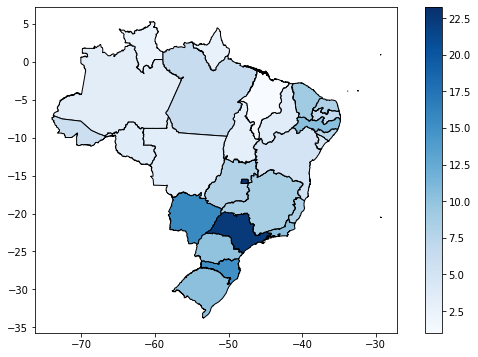

In [80]:
%matplotlib inline

mapa_br.plot(column = 'tx_pop',
             cmap = 'Blues',
             figsize = (10, 6),
             legend = True,
             edgecolor = 'black')